## Notebook to troubleshoot MCMC trace decoder

In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt
from init_mcmc_two_state import init_single_prom_mcmc
from trace_simulators import simulate_initiation_states
from numpy import linalg as LA

### Define system parameters

In [58]:
# transition and emission arrays
A = np.array([[.95, .3],
              [.05, .7]])

p = [.1,.9]

# basic trace parameters
memory = 7*10 # number of time steps for Pol II to teranscribe gene
dT = 20 # time resolution of experimental data
tau = 2 # minimum time scale of the system
cv_factor = int(dT/tau)
# Fix trace length for now
trace_len = 500 # length of simulated trace (time steps)
# Number of traces per batch
sigma = 20 # stdev of Gaussian noise
r = 20 
alpha = 14
# set priors
a_prior = np.ones((2, 2))
p_prior = np.ones((2, 2))
pi0_prior = np.ones((2))

### Simulate trace

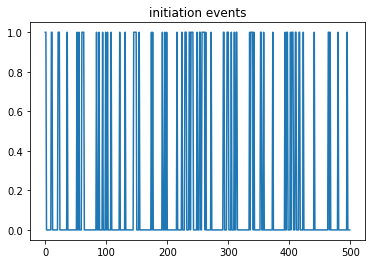

In [38]:
#fluo_noise, fluo_raw, fluo_unif, system_states, initiation_states \
#    = simulate_traces(tau, dT, memory, trace_len, A, e, r, sigma, alpha)

system_states, initiation_states = simulate_initiation_states(trace_len, A, p)

#fig1, ax1 = plt.subplots()
#ax1.plot(fluo_noise)
#ax1.set_title("Observed fluorescence (simulated)")
#ax1.set_xlabel("time")
#ax1.set_ylabel("fluorescence (au)")

fig2, ax2 = plt.subplots()
ax2.set_title("initiation events")
ax2.plot(initiation_states)

## Call fitting function

In [43]:
n_steps = 300
logL_list, p_array_list, a_array_list, pi0_array_list = \
    init_single_prom_mcmc([initiation_states], a_prior, p_prior, pi0_prior, n_steps=n_steps, burn_in=1)

## Track trends in learning (or lack thereof)

Text(0.5, 0, 'iteration')

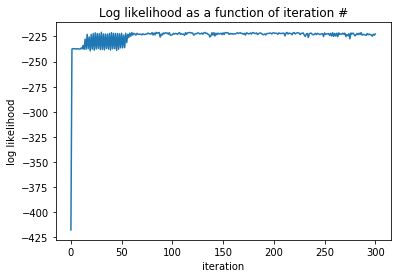

In [44]:
fig1, ax1 = plt.subplots()
ax1.plot(logL_list)
ax1.set_title("Log likelihood as a function of iteration #")
ax1.set_ylabel("log likelihood")
ax1.set_xlabel("iteration")

(array([17., 24., 19., 16., 13.,  8., 13.,  7.,  6.,  2.]),
 array([0.02030939, 0.02645814, 0.0326069 , 0.03875565, 0.04490441,
        0.05105316, 0.05720192, 0.06335068, 0.06949943, 0.07564819,
        0.08179694]),
 <a list of 10 Patch objects>)

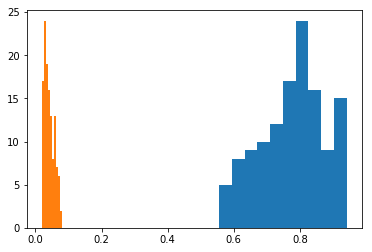

In [46]:
p0_vec = [p0[1,0] for p0 in p_array_list[175:-1]]
p1_vec = [p1[1,1] for p1 in p_array_list[175:-1]]
plt.hist(p0_vec)
plt.hist(p1_vec)

(array([ 3.,  9., 24., 18., 25., 18., 16.,  8.,  3.,  1.]),
 array([0.26400181, 0.30596341, 0.34792502, 0.38988663, 0.43184824,
        0.47380985, 0.51577146, 0.55773307, 0.59969467, 0.64165628,
        0.68361789]),
 <a list of 10 Patch objects>)

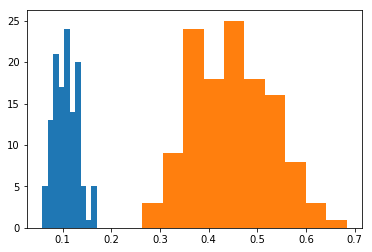

In [56]:
k0_vec = [k[0,1] for k in (a_array_list[175:-1])]
k1_vec = [k[1,0] for k in (a_array_list[175:-1])]

plt.hist(k0_vec)
plt.hist(k1_vec)

In [57]:
t = 210
print(a_array_list[t])
print(p_array_list[t])

[[0.5418353  0.10841107]
 [0.4581647  0.89158893]]
[[0.2288335  0.97273937]
 [0.7711665  0.02726063]]
